In [1]:
# follow this tutorial: https://github.com/jni/skan/blob/ca97b553772684ccba60e26a34664a65b7a3aef9/doc/visualizing_3d_skeletons.md


In [2]:
import skimage.io as skio
from glob import glob
import imageio as iio

In [3]:
import os
import numpy as np
from PIL import Image


#load in my vessel network file in the subdirectory called 'example-data'
vessel_file_path = os.path.join('example-data', 'segmented-vessel-network.tif')
protein_file_path = os.path.join('example-data', 'segmented-surrounding-protein.tif')

#see this for loading multipage tiff: https://biomedicalhub.github.io/python-data/skimage.html
binary_vessel_image=skio.imread(vessel_file_path, plugin="tifffile") #this is the vessel network file
binary_surrounding_protein_image=skio.imread(protein_file_path, plugin="tifffile") #this is the vessel network file



In [4]:
from skan.pre import threshold

In [5]:
from skimage import morphology

In [6]:
from skan import draw

In [7]:
import napari
import numpy as np
import skan
from skimage.data import binary_blobs
from skimage.morphology import skeletonize
import scipy.ndimage as ndi

binary_skeleton = skeletonize(binary_vessel_image)
skeleton= skan.Skeleton(binary_skeleton)


In [8]:
all_paths = [
        skeleton.path_coordinates(i)
        for i in range(skeleton.n_paths)
        ]

In [9]:
paths_table = skan.summarize(skeleton)

In [10]:
paths_table['path-id'] = np.arange(skeleton.n_paths)

In [11]:
paths_table['random-path-id'] = np.random.default_rng().permutation(skeleton.n_paths)

In [12]:
viewer = napari.Viewer(ndisplay=3)

#need to add the binary image before adding the shape/lines so that the lines are not covered
# can also hide the layer in napari after the fact
# but easier to create the image layer (add_images) before adding the shapes layer (add_shapes)


#add in the images of the blood vessel network and surrounding-proteins for visualization in Napari
#solution to add image to napari is to use .add_image (instead of .add_shapes)
binary_vessel_layer = viewer.add_image(
        binary_vessel_image,
        rendering='iso',
)


binary_surrounding_protein_layer = viewer.add_image(
    binary_surrounding_protein_image,
    colormap='green',
    rendering = 'average',
)


#skeleton_layer is from the Skan tutorial
skeleton_layer = viewer.add_shapes(
        all_paths,
        shape_type='path',
        properties=paths_table,
        edge_width=0.5, # can change the edge-width here so that the skeleton thickness visualization changes
        edge_color='random-path-id',
        edge_colormap='tab10',
)

C:\ProgramData\Anaconda3\lib\site-packages\napari\_qt\__init__.py:50: UserWarning: 

napari was tested with QT library `>=5.12.3`.
The version installed is 5.9.7. Please report any issues with
this specific QT version at https://github.com/Napari/napari/issues.
  warn(message=warn_message)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:2453: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


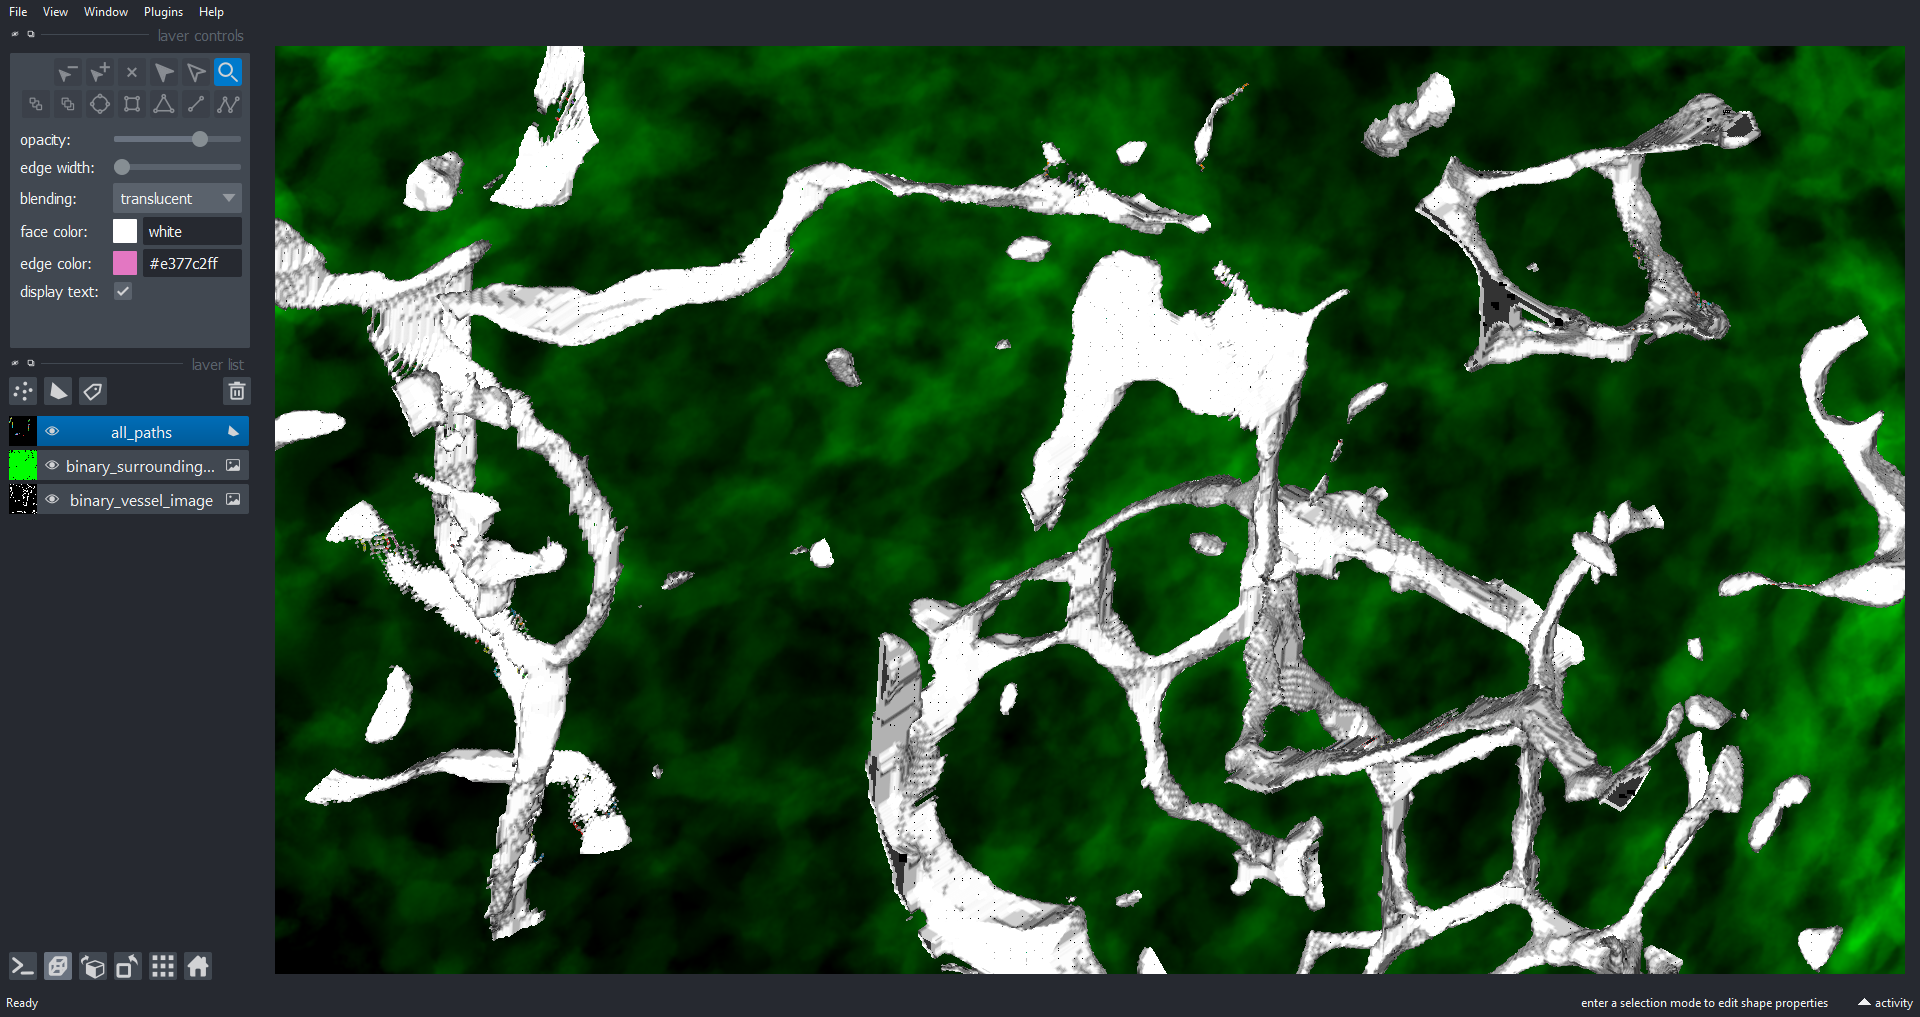

In [13]:
#:tags: ["remove-input"] #tags doesn't work in Jupyter notebook
viewer.camera.angles = (-30, 30, -135)
viewer.camera.zoom = 2
napari.utils.nbscreenshot(viewer)

In [14]:
#IGNORE CODE BLOCK

#skeleton_layer.edge_color = 'skeleton-id'
# for now, we need to set the face color as well
#skeleton_layer.face_color = 'skeleton-id'

In [15]:
#IGNORE CODE BLOCK

#:tags: ["remove-input"] #tags doesn't work in Jupyter notebook
#viewer.camera.angles = (-30, 30, -135)
#napari.utils.nbscreenshot(viewer)

In [16]:
#IGNORE CODE BLOCK

#skeleton_layer.edge_color = 'branch-distance'
#skeleton_layer.edge_colormap = 'viridis'
# for now, we need to set the face color as well
#skeleton_layer.face_color = 'branch-distance'
#skeleton_layer.face_colormap = 'viridis'

In [17]:
#IGNORE CODE BLOCK

#:tags: ["remove-input"] #tags doesn't work in Jupyter notebook
#viewer.camera.angles = (-30, 30, -135)
#napari.utils.nbscreenshot(viewer)

In [18]:
#IGNORE CODE BLOCK

#labels = np.asarray(skeleton)

#viewer2 = napari.view_labels(
#        labels,
#        properties=paths_table,
#        opacity=1,
#        ndisplay=3,
#        )

In [19]:
#IGNORE CODE BLOCK

#:tags: ["remove-input"] #tags doesn't work in Jupyter notebook
#viewer2.camera.angles = (-30, 30, -135)
#viewer2.camera.zoom = 6.5
#napari.utils.nbscreenshot(viewer2)

In [20]:
# print all rows of pandas dataframe, Skan uses pandas
# see: https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/ 
import pandas as pd
pd.set_option('display.max_rows', None)

In [21]:
print(paths_table["euclidean-distance"])
#  unclear if euclidean-distance is 'radius' or 'diameter'
# update: euclidean-distance is neither radius nor diameter
# see: https://forum.image.sc/t/how-to-dilate-skeleton-based-on-vessel-diamater/65549/4 

0       5.656854
1       8.717798
2       5.000000
3      22.649503
4       2.449490
5       6.324555
6       2.000000
7      45.803930
8       4.123106
9      64.606501
10      6.000000
11     51.127292
12     18.466185
13     92.703829
14      5.385165
15     70.887234
16     34.942810
17     32.802439
18     39.064050
19      6.403124
20      2.236068
21     13.341664
22      6.782330
23      4.123106
24      3.316625
25      4.242641
26      4.472136
27     32.031235
28     14.282857
29      3.000000
30     10.954451
31      5.656854
32     49.162994
33      9.055385
34     18.248288
35     16.522712
36      4.123106
37      1.732051
38      6.164414
39     11.661904
40      7.615773
41      5.830952
42      2.236068
43      2.449490
44      4.123106
45      5.744563
46      1.732051
47     34.770677
48      1.414214
49      2.236068
50      6.928203
51     17.291616
52      2.000000
53     13.490738
54      4.123106
55      3.162278
56      7.483315
57      1.414214
58      2.2360

In [22]:
#print(all_paths) 

In [23]:
#From imageSC thread with me and Juan: https://forum.image.sc/t/how-to-dilate-skeleton-based-on-vessel-diamater/65549
from skimage import measure, segmentation, filters


#question 1: should label_seeds take 'binary_skeleton', or the skan skeleton 'skeleton'?
#label_seeds = np.asarray(binary_skeleton)
label_seeds = np.asarray(skeleton)

#don't need vessels_mask since the original image is already segmented/thresholded
#vessels_mask = filters.threshold_otsu(vessels) < vessels  # maybe try different thresholds, not sure here

vessel_segments = segmentation.watershed(binary_vessel_image, label_seeds, mask=binary_vessel_image)
measurements = measure.regionprops(vessel_segments, intensity_image=binary_surrounding_protein_image)

In [24]:
#IGNORE CODE BLOCK

#print the mean intensity for each vessel branch (before dilating) -- not working
#see: https://stackoverflow.com/questions/51422150/mean-intensity-attribute-of-regionprops-returns-different-values-depending-on-th

#note: none of the code in this code block works

#print(measurements) #does not seem useful to me at this point

#print(measurements[2].mean_intensity) #I think this works. Appears to print the mean_intensity of branch 2
#print(measurements[5].mean_intensity) #I think this works. Appears to print the mean_intensity of branch 5


#print(measurements.mean_intensity) # does not work. Error:"AttributeError: 'list' object has no attribute 'mean_intensity'"

#pd.DataFrame(measurements) #just gives me a bunch of different parameters. not useful for my purposes
#pd.DataFrame(measurements[1]) #here are all the different parameters which are measured. mean_intensity is parameter #22
#pd.DataFrame(measurements)[22] #here is column 22, which contains the string 'mean_intensity'. Presumably the string is repeated for each vessel branch. 
#pd.DataFrame(measurements)[22][0] #I think this is the first row in column 22. Just prints out 'mean_intensity' once
#pd.DataFrame(measurements)[22][0][0] #This is the first character ('m') in the string 'mean_intensity' from the first row in column 22
#pd.DataFrame(measurements.mean_intensity) #does not work


#for m in measurements.mean_intensity:
#    #print(measurements[m].mean_intensity)
#    print(m)


# see: https://github.com/scikit-image/scikit-image/issues/5048
# see: https://programtalk.com/python-examples/skimage.measure.regionprops/




In [25]:
#print the mean intensity for each vessel branch (before dilating) -- working solution

#see video on making regionprops table: https://www.youtube.com/watch?v=u3nG5_EjfM0
# this shows how to extract the properties of labeled objects using regionprops_table

#attempt 1 (doesn't work):
#measurements_table = measure.regionprops_table(vessel_segments, intensity_image=binary_surrounding_protein_image)
#measurements = measure.regionprops(vessel_segments, intensity_image=binary_surrounding_protein_image)
#df = pd.DataFrame(measurements_table)
#print(df)
# this didn't really work. col1 is 'label', col2 is 'bbox-0',
#   col3 is 'bbox-1', col4 is 'bbox-2', col5 is 'bbox-3', col6 is 'bbox-4', and col7 is 'bbox-5'



#attempt 2 (this works):
#try something else
measurements_table2 = measure.regionprops_table(vessel_segments, intensity_image=binary_surrounding_protein_image,
                                                properties=['label',
                                                        'mean_intensity', 'area'])
df2 = pd.DataFrame(measurements_table2)
print(df2)
# this appears to work
#note: the labels don't match up perfectly with the row number. Why is this?
# I understand that labels start at [i+1] whereas rows start at [i]. This explains why labels is 1 value greater than row num
# but in 4 specific rows, the label column will skip a value. 
# The result is by the last row in the dataframe, the labels counter is 5 values greater than the row value
# see: in row 549 to row 550, label jumps from 550 to 552 (rather than 551)
# see: in row 549 to row 550, label jumps from 550 to 552 (rather than 551)

     label  mean_intensity   area
0        1       88.578947     95
1        2      255.000000    300
2        3      255.000000     73
3        4      255.000000    851
4        5      255.000000    111
5        6      255.000000     39
6        7      255.000000     13
7        8      252.701667   2219
8        9        3.695652    138
9       10      232.836914   2048
10      11      112.321429     84
11      12      254.908733   2794
12      13      255.000000    549
13      14      253.666318   2868
14      15      255.000000    130
15      16      254.209547   3226
16      17      245.476497   1553
17      18      252.308707   1516
18      19      255.000000   1391
19      20      255.000000    124
20      21      193.974359    468
21      22      231.031332    766
22      23      255.000000     45
23      24      255.000000     22
24      25      255.000000      7
25      26      255.000000     25
26      27      255.000000     10
27      28      203.771227   3121
28      29    

In [26]:
#print(vessel_segments) #not really sure what this list of arrays are
#  possibly tells me where pixels are present for each object label?

In [27]:
#IGNORE CODE BLOCK

#now I visualize the vessels which are separated using the watershed (not working)

#this gives an error when using add_shapes...
#vessel_segments_layer = viewer.add_shapes(
#        vessel_segments,
#        shape_type='path',
#        #properties=paths_table,
#        #edge_width=0.5,
#        edge_color='random-path-id',
#        #edge_colormap='tab10',
#)

In [28]:
# use napari to visualize the seeded watershed from the variable 'vessel_segments'
#see : https://forum.image.sc/t/3d-python-cell-segmentation-example/54122
    # see: https://jni.github.io/i2k-skimage-napari/lectures/2_segmentation_and_regionprops.html

# this appears to work, uses .add_labels instead of .add_shapes
vessel_segments_layer = viewer.add_labels(
        vessel_segments,
        blending='opaque',
        rendering='iso_categorical',
#        blending='translucent_no_depth',
#        rendering='iso_categorical',
)

#not sure how to make the colors match between the (i) labels layer of the seeded watershed and the (ii) skeleton used in label_seeds

In [29]:
#dilate the vessels that have undergone the seeded watershed (i.e. vessel_segments)

#see use case: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_expand_labels.html#sphx-glr-auto-examples-segmentation-plot-expand-labels-py

#expand each vessel segment by 10 pixels as a test i.e. distance=10
dilated_vessel_segments = segmentation.expand_labels(vessel_segments, distance=10)

In [30]:
#visualize the dilated vessels

dilated_vessel_segments_layer = viewer.add_labels(
        dilated_vessel_segments,
        blending='opaque',
        rendering='iso_categorical',
#        blending='translucent_no_depth',
#        rendering='iso_categorical',
)


In [31]:
#get the part of the dilated vessel only i.e. without the core
# take the dilated vessel and subtract the original vessel shape

outer_core_segments = dilated_vessel_segments - vessel_segments

In [32]:
#visualize the outer core vessels

outer_core_segments_layer = viewer.add_labels(
        outer_core_segments,
        blending='opaque',
        rendering='iso_categorical',
#        blending='translucent_no_depth',
#        rendering='iso_categorical',
)


In [38]:
#print the mean intensity for each outer core surrounding each vessel branch (i.e. after dilating) -- this works

# so now we want to quantify the amount of segmented protein surrounding EACH vessel branch
#based on Juan's previous idea

#"Also, note that if you binarise the surrounding protein image, then taking the mean intensity measures (vessel AND protein) / vessel, which I think makes more sense than the OR"

#region props use case: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_regionprops.html


measurements_table3 = measure.regionprops_table(outer_core_segments, intensity_image=binary_surrounding_protein_image,
                                                properties=['label',
                                                        'mean_intensity', 'area'])
df3 = pd.DataFrame(measurements_table3)
print(df3)
#note: the labels don't match up perfectly with the row number. Why is this?
# I understand that labels start at [i+1] whereas rows start at [i]. This explains why labels is 1 value greater than row num
# but in 4 specific rows, the label column will skip a value. 
# The result is by the last row in the dataframe, the labels counter is 5 values greater than the row value
# see: in row 163 to row 164, label jumps from 164 to 166 (rather than 165)
# see: in row 244 to row 245, label jumps from 246 to 248 (rather than 247)
# see: in row 547 to row 548, label jumps from 550 to 552 (rather than 551)
# see: in row 574 to row 575, label jumps from 578 to 580 (rather than 579)


     label  mean_intensity   area
0        1      100.502752   5450
1        2      117.218413   3063
2        3       66.103448   2465
3        4      108.918697   4268
4        5      132.247956   1101
5        6      172.793073   4504
6        7      209.560044   3614
7        8      104.282987  21736
8        9        0.401070   3179
9       10       42.259189  19943
10      11       10.976172   1301
11      12      109.366755  25622
12      13      152.712878   8526
13      14      163.043320  53578
14      15      176.611818   1337
15      16      168.319464  34849
16      17      145.118077  17658
17      18       96.354717  11925
18      19      132.762482  21030
19      20       75.153959   2046
20      21      150.236424   8692
21      22      158.764200   8715
22      23      127.500000    608
23      24      123.737705    305
24      25      134.785714     70
25      26      103.593750    320
26      27      151.341463    123
27      28      194.277366  20363
28      29    

In [35]:
# another idea is to use expand_labels in python; Juan also suggested this
# see: https://forum.image.sc/t/watershed-in-3d-shell/60564/3

In [36]:
# for later, visualizing movies using napari: https://forum.image.sc/t/movies-with-napari/31588 